In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Champagne dataset**: This dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 9 years of data. The values are a count of millions of sales and there are 105 observations. The dataset is credited to Makridakis and Wheelwright, 1989.

We want to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France).

In [266]:
df = pd.read_csv(r'C:\Users\272242\Desktop\GITHUB_ML Projects\Perrin Freres monthly champagne sales millions.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [267]:
df=df.dropna()
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [268]:
# Change the column name from 'Perrin Freres monthly champagne sales millions ?64-?72' to 'Sales'
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)

In [269]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [270]:
# Convert 'Month' column to datetime format with placeholder day and year
from datetime import datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace= True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [271]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualize the data

<Axes: xlabel='Month'>

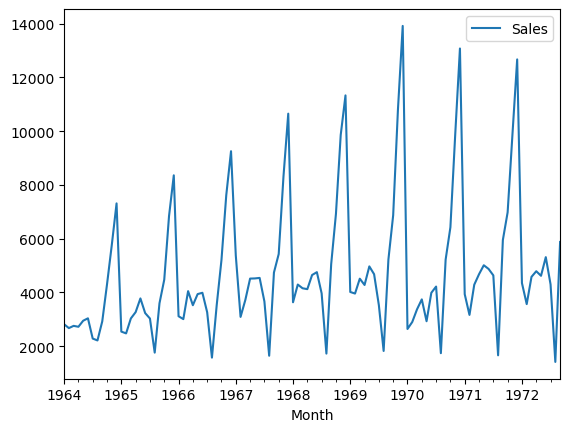

In [272]:
df.plot()

In [10]:
df.head(3)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0


Text(0.5, 1.0, 'Lag plot of Sales')

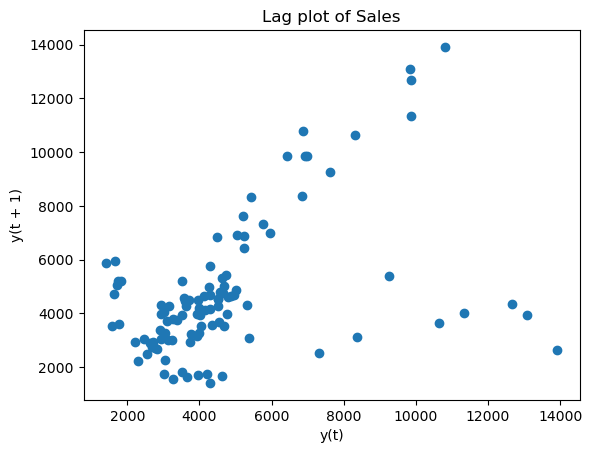

In [11]:
from pandas.plotting import lag_plot
lag_plot(df.Sales)
plt.title('Lag plot of Sales')

# Persistence model
* A persistence model, in the context of time series forecasting, is a simple baseline model that predicts future values by using the most recent observed value as the prediction for the next time step. 
* This approach assumes that the future value will be similar to the most recent historical value, effectively persisting the last known value forward in time.

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare data
X = df.Sales.values
#X = X.astype('float32')
X.shape

(105,)

In [13]:
# training data is 80% and rest is test data
train_size = int(len(X) * 0.10)
train, test = X[0:train_size], X[train_size:]
train.shape, test.shape

((10,), (95,))

In [14]:
# walk-forward validation

history = [x for x in train]    # create copy of train in history
predictions_basic = list()
pred_test=[]
for i in range(len(test)):
        # predict
        yhat = history[-1]
        predictions_basic.append(yhat)
        # observation
        obs = test[i]
        history.append(obs)
        pred_test.append(yhat)
        print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
        


>Predicted=4301.000, Expected=5764
>Predicted=5764.000, Expected=7312
>Predicted=7312.000, Expected=2541
>Predicted=2541.000, Expected=2475
>Predicted=2475.000, Expected=3031
>Predicted=3031.000, Expected=3266
>Predicted=3266.000, Expected=3776
>Predicted=3776.000, Expected=3230
>Predicted=3230.000, Expected=3028
>Predicted=3028.000, Expected=1759
>Predicted=1759.000, Expected=3595
>Predicted=3595.000, Expected=4474
>Predicted=4474.000, Expected=6838
>Predicted=6838.000, Expected=8357
>Predicted=8357.000, Expected=3113
>Predicted=3113.000, Expected=3006
>Predicted=3006.000, Expected=4047
>Predicted=4047.000, Expected=3523
>Predicted=3523.000, Expected=3937
>Predicted=3937.000, Expected=3986
>Predicted=3986.000, Expected=3260
>Predicted=3260.000, Expected=1573
>Predicted=1573.000, Expected=3528
>Predicted=3528.000, Expected=5211
>Predicted=5211.000, Expected=7614
>Predicted=7614.000, Expected=9254
>Predicted=9254.000, Expected=5375
>Predicted=5375.000, Expected=3088
>Predicted=3088.000,

In [15]:
# report performance
mse = mean_squared_error(test, predictions_basic)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 2754.651


* The persistence model achieved an RMSE of 3316.743. 
* This means that on average, the model was wrong by about 3316 million sales for each prediction made

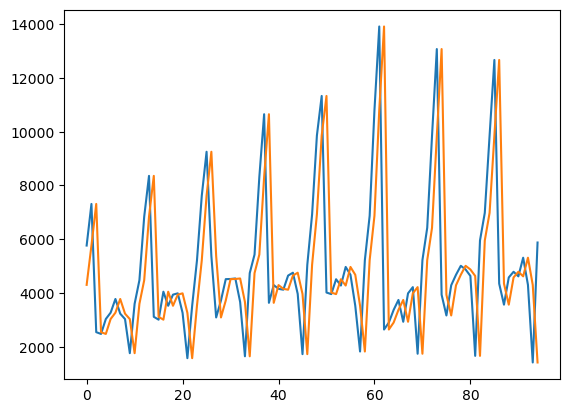

In [16]:
plt.plot(test)
plt.plot(pred_test)

# ARIMA

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [18]:
# from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import adfuller
adfuller_test(df['Sales'])

ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing to make data stationary

In [19]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df.head(7)

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0


In [20]:
#dickey fuller test
# Testing For Stationarity

adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.189896448051016
p-value : 2.519620447386879e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


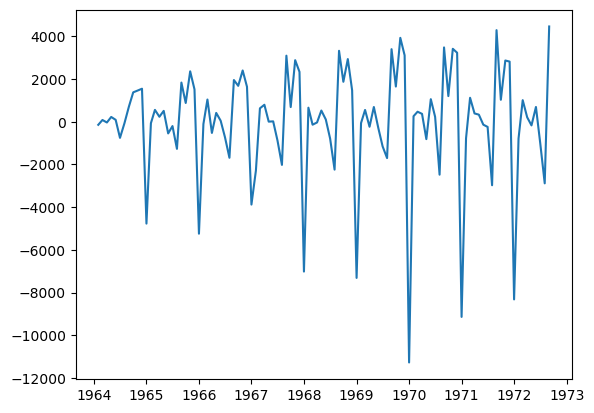

In [21]:
plt.plot(df.iloc[1:,1])

## Now, the p-value of first difference is less than 0.05, hence we say that the data is stationary

## Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
* p,d,q in ARIMA model
* p - AR model lags 
* d - differencing 
* q - MA lags
 


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

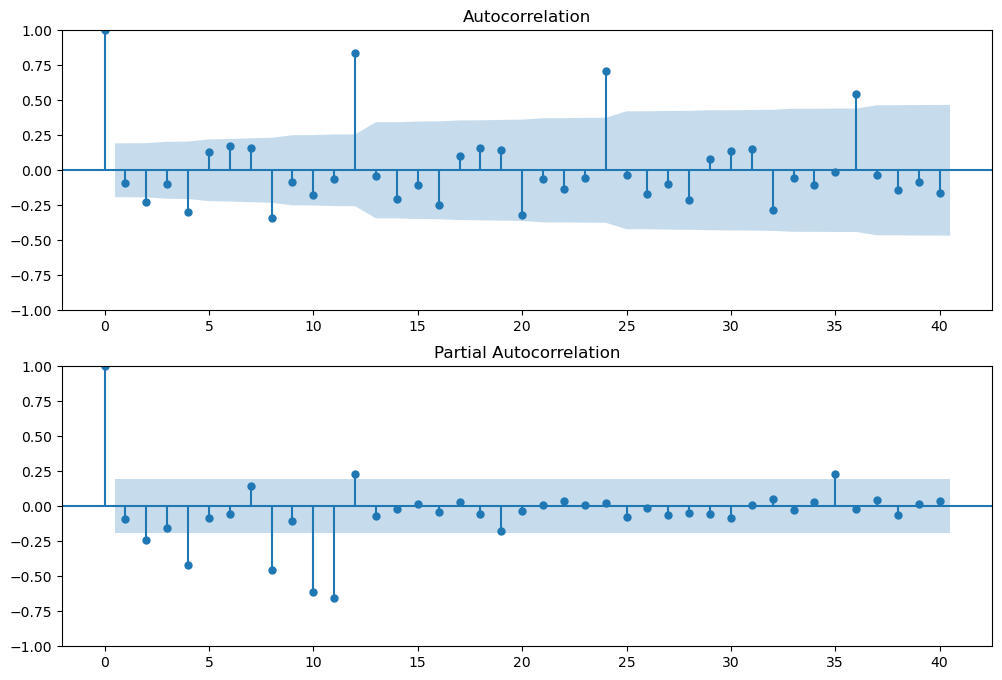

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].dropna(),lags=40,ax=ax2)

In [204]:
df.shape

(105, 2)

## train - test split for First Differenced data

In [24]:
train = df.iloc[1:len(df)-10,1]
test= df.iloc[len(df)-10:,1]
# train,test

In [25]:
train.shape, test.shape

((94,), (10,))

In [207]:
# plt.plot(train)

In [208]:
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(train,lags=40,ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(train,lags=40,ax=ax2)

In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [27]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(11, 1, 12))
model_fit_A = model.fit()
model_fit_A.summary()
# df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
# df[['Sales First Difference','forecast']].plot(figsize=(12,8))

C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Sales First Difference   No. Observations:                   94
Model:                   ARIMA(11, 1, 12)   Log Likelihood                -765.467
Date:                    Mon, 21 Aug 2023   AIC                           1578.934
Time:                            15:45:10   BIC                           1639.717
Sample:                        02-01-1964   HQIC                          1603.476
                             - 11-01-1971                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8732      0.175     -4.996      0.000      -1.216      -0.531
ar.L2         -0.9556      0.112     -8.558      0.000      -1.175      -0.737
ar.L3         -0.8695      0.151     -5.747      0.000      -1.166      -0.573
ar.L4         -1.0051      0.123     -8.202      0.000      -1.245      -0.765
ar.L5         -0.8801      0.189     -4.669      0.000      -1.250      -0.511
ar.L6         -0.9277      0.147     -6.325      0.000      -1.215      -0.640
ar.L7         -0.8206      0.171     -4.793      0.000      -1.156      -0.485
ar.L8         -0.9769      0.103     -9.468      0.000      -1.179      -0.775
ar.L9         -0.8335      0.204     -4.090      0.000      -1.233      -0.434
ar.L10        -0.9086      0.105     -8.680      0.000      -1.114      -0.703
ar.L11        -0.8092      0.170     -4.755      0.000      -1.143      -0.476
ma.L1         -0.7381      0.209     -3.533      0.000      -1.148      -0.329
ma.L2          0.0191      0.378      0.050      0.960      -0.722       0.761
ma.L3         -0.0991      0.321     -0.309      0.757      -0.727       0.529
ma.L4          0.1535      0.332      0.462      0.644      -0.497       0.804
ma.L5         -0.4570      0.290     -1.577      0.115      -1.025       0.111
ma.L6          0.0984      0.327      0.301      0.763      -0.542       0.739
ma.L7          0.0843      0.319      0.264      0.792      -0.541       0.710
ma.L8          0.3890      0.310      1.254      0.210      -0.219       0.997
ma.L9         -0.4859      0.321     -1.512      0.130      -1.116       0.144
ma.L10         0.2247      0.458      0.490      0.624      -0.673       1.123
ma.L11        -0.1502      0.385     -0.390      0.696      -0.904       0.604
ma.L12         0.1036      0.319      0.325      0.745      -0.522       0.729
sigma2      6.884e+05   1.68e+05      4.102      0.000    3.59e+05    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                63.91
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                            -1.20
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.54e+14. Standard errors may be unstable.
"""

In [28]:
# train.index 
test.index

DatetimeIndex(['1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [34]:
# # Make predictions using the fitted model

# start_date = '1965-02-01'
# end_date = '1971-09-01'
# forecast = model_fit_A.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)
# forecast_values_train_arima = forecast.predicted_mean
# confidence_intervals = forecast.conf_int()

# Make predictions using the fitted model

start_date = '1971-12-01'
end_date = '1972-09-01'
forecast = model_fit_A.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)
forecast_values_test_arima = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

Text(0.5, 1.0, 'Predicted Test Differenced Vs Actual Test ifference')

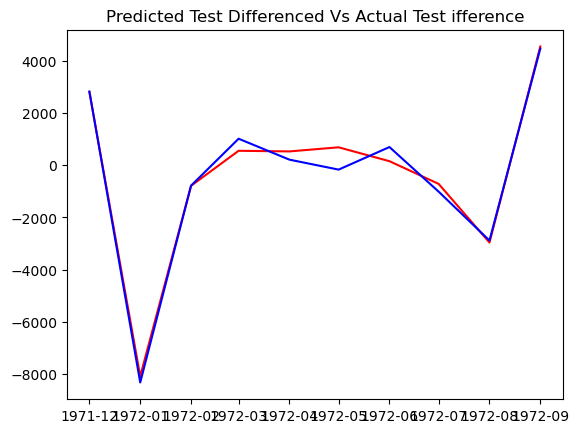

In [35]:
# plt.plot(forecast_values_train_arima,'y')
# plt.plot(train)
plt.plot(forecast_values_test_arima,'r')
plt.plot(test,'b')
plt.title('Predicted Test Differenced Vs Actual Test ifference')

In [43]:
# forecast_values_test_arima.values[0], test
train.tail()

Month
1971-07-01    -241.0
1971-08-01   -2974.0
1971-09-01    4292.0
1971-10-01    1030.0
1971-11-01    2870.0
Name: Sales First Difference, dtype: float64

In [44]:
df.loc['1971-11-01', 'Sales']  # sales data for last date in train 

9851.0

In [45]:
# Undo the first differencing to get the original predictions on Train data:

predicted_values = np.zeros(len(forecast_values_test_arima) + 1)
predicted_values[0] = 9851.0    # last_value in original data for last date in train i.e. 1971-09-01

for i in range(1, len(predicted_values)):
    predicted_values[i] = predicted_values[i-1] + forecast_values_test_arima.values[i-1]

In [46]:
df.shape

(105, 2)

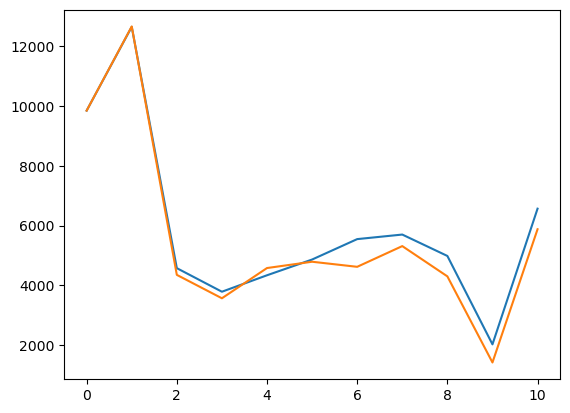

In [47]:
plt.plot(predicted_values)
plt.plot(df.iloc[len(train):105,0].values)

In [48]:
predicted_values.shape, df.iloc[len(train):105,0].values.shape

((11,), (11,))

In [49]:
# report performance
mse = mean_squared_error(df.iloc[len(train)+1:105,0].values, predicted_values[1:])
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 498.528


___
# Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [221]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# df['DESadd12'] = ExponentialSmoothing(df['Sales'], trend='add').fit().fittedvalues.shift(-1)
# df.head()

In [222]:
# df[['Sales','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

___
# Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



In [223]:
train = df.iloc[:95,0]
test = df.iloc[95:,0]
train.shape, test.shape

((95,), (10,))

In [224]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()

In [225]:
# test predictions

# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT EFFECT YOUR FORECAST, ITS JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(10).rename('HW Forecast')
test_predictions

1971-12-01    13522.171437
1972-01-01     4100.521185
1972-02-01     3615.943081
1972-03-01     4552.581533
1972-04-01     4885.338914
1972-05-01     4986.987996
1972-06-01     5087.588969
1972-07-01     4871.561804
1972-08-01     2114.627722
1972-09-01     6160.476779
Freq: MS, Name: HW Forecast, dtype: float64

<Axes: xlabel='Month'>

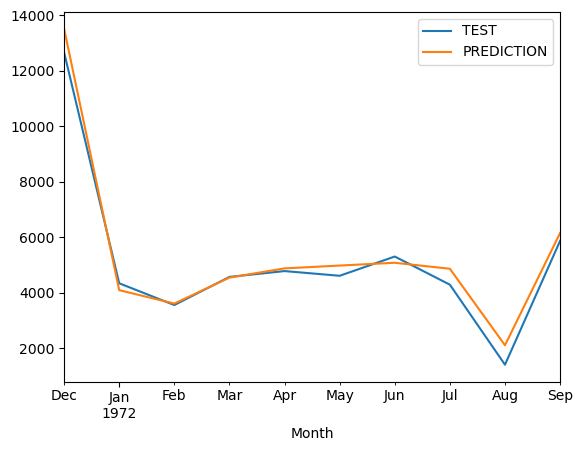

In [226]:
# train.plot(legend=True,label='TRAIN')
test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')

In [227]:
from statsmodels.tools.eval_measures import rmse
error =rmse(test,test_predictions)
error

434.55002818661666

## Forecasting sales for future 12 months

In [228]:
final_model = ExponentialSmoothing(df['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()

In [229]:
forecast_predictions = final_model.forecast(24)

<Axes: xlabel='Month'>

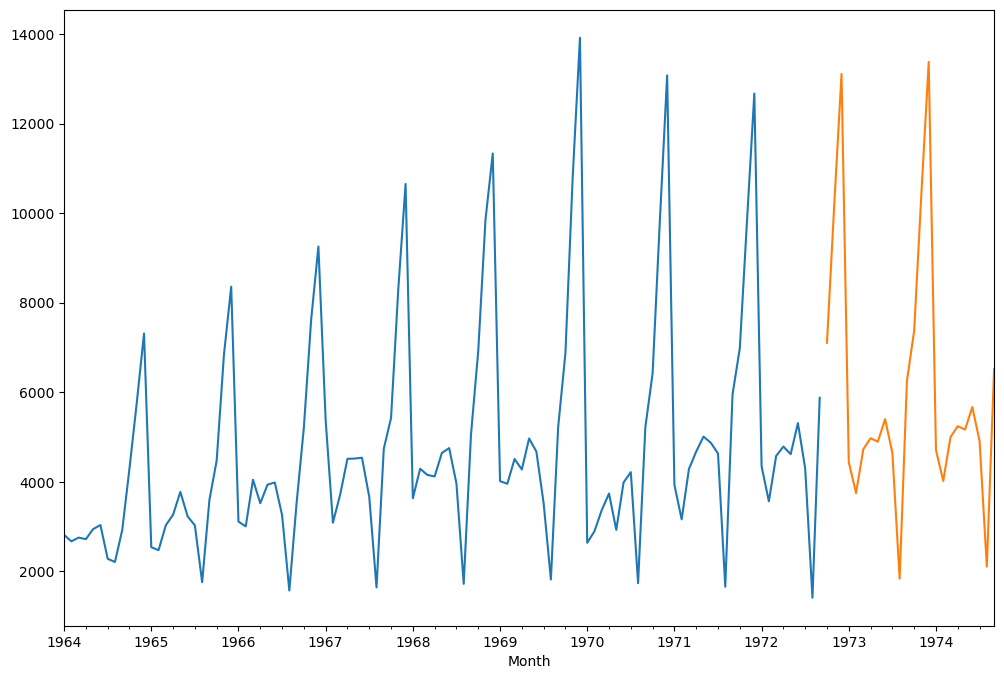

In [230]:
df['Sales'].plot(figsize=(12,8))
forecast_predictions.plot()

___
# 2. SARIMA

In [125]:
# # Checking Trend and Seasonality

from statsmodels.tsa.seasonal import seasonal_decompose 

# decomposition = seasonal_decompose(df['Sales'], period=30)
# trend = decomposition.trend 
# seasonal = decomposition.seasonal 
# residual = decomposition.resid
# plt.subplot(411) 
# plt.plot(df['Sales'].dropna(), label='Original') 
# plt.legend(loc='best') 
# plt.subplot(412) 
# plt.plot(trend, label='Trend') 
# plt.legend(loc='best') 
# plt.subplot(413) 
# plt.plot(seasonal,label='Seasonality') 
# plt.legend(loc='best') 
# plt.subplot(414) 
# plt.plot(residual, label='Residuals') 
# plt.legend(loc='best') 
# plt.tight_layout() 
# plt.show()

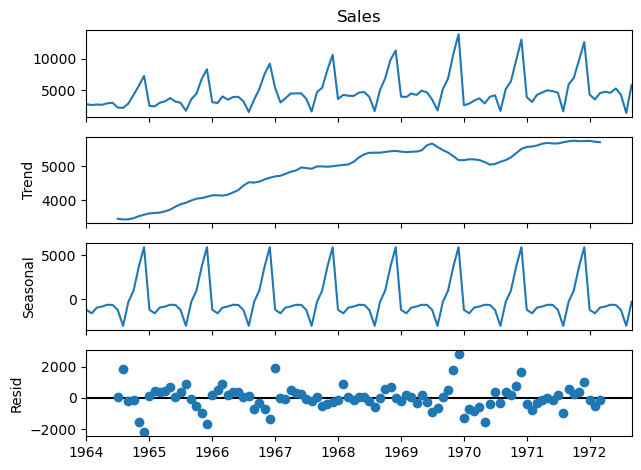

In [126]:
result = seasonal_decompose(df['Sales'],model='add')
result.plot();

In [127]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [128]:
from pmdarima import auto_arima

In [129]:
auto_arima(df.Sales, seasonality = True, m=12)

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [130]:
df.shape

(105, 1)

In [131]:
train = df.iloc[:95,0]
test = df.iloc[95:,0]

In [132]:
test.shape, train.shape

((10,), (95,))

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [134]:
model=SARIMAX(train,order=(0,0,1), seasonal_order = (1,1,0,12))

C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [135]:
results_1 = model.fit()

In [136]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   95
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                -674.127
Date:                             Mon, 21 Aug 2023   AIC                           1354.253
Time:                                     17:08:34   BIC                           1361.510
Sample:                                 01-01-1964   HQIC                          1357.169
                                      - 11-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2689      0.089      3.022      0.003       0.094       0.443
ar.S.L12      -0.0695      0.086     -0.805      0.421      -0.239       0.100
sigma2      6.484e+05   8.53e+04      7.598      0.000    4.81e+05    8.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 8.20
Prob(Q):                              0.72   Prob(JB):                         0.02
Heteroskedasticity (H):               1.62   Skew:                            -0.28
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
# Predicting on test data
start = len(train)
end = len(df)-1
predictions = results_1.predict(start, end, typ = 'levels').rename('SARIMA_PREDICTIONS')

<Axes: xlabel='Month'>

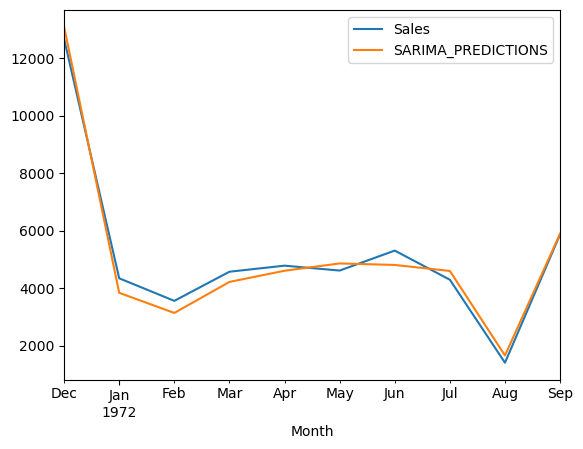

In [138]:
test.plot(legend=True)
predictions.plot(legend=True)

In [139]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test[i]}")

predicted=13095.95697, expected=12670.0
predicted=3844.017121, expected=4348.0
predicted=3143.725485, expected=3564.0
predicted=4222.351878, expected=4577.0
predicted=4610.962181, expected=4788.0
predicted=4865.26306 , expected=4618.0
predicted=4812.297454, expected=5312.0
predicted=4604.094303, expected=4298.0
predicted=1664.489303, expected=1413.0
predicted=5900.27606 , expected=5877.0


In [140]:
# # report performance
# mse = mean_squared_error(test, predictions)
# rmse = sqrt(mse)
# print('RMSE: %.3f' % rmse)
from statsmodels.tools.eval_measures import rmse
error =rmse(test,predictions)
error

351.7826670075996

### Retrain the model on the full data, and forecast for 12 months


*  typ='levels': When you set typ to 'levels', the predict method will return the forecasted values in the original levels of the time series. In other words, the values returned by the prediction will not be in terms of any differencing or transformations that might have been applied to the data. This is often used when you want to get the actual forecasted values that are directly comparable to the original data.


In [141]:
model = SARIMAX(df['Sales'],order=(0,0,1), seasonal_order = (1,1,0,12))
results = model.fit()
forecast = results.predict(len(df)-1,len(df)+12,typ='levels').rename('SARIMA(0,0,1),(1,1,0,12) Forecast')

C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\272242\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


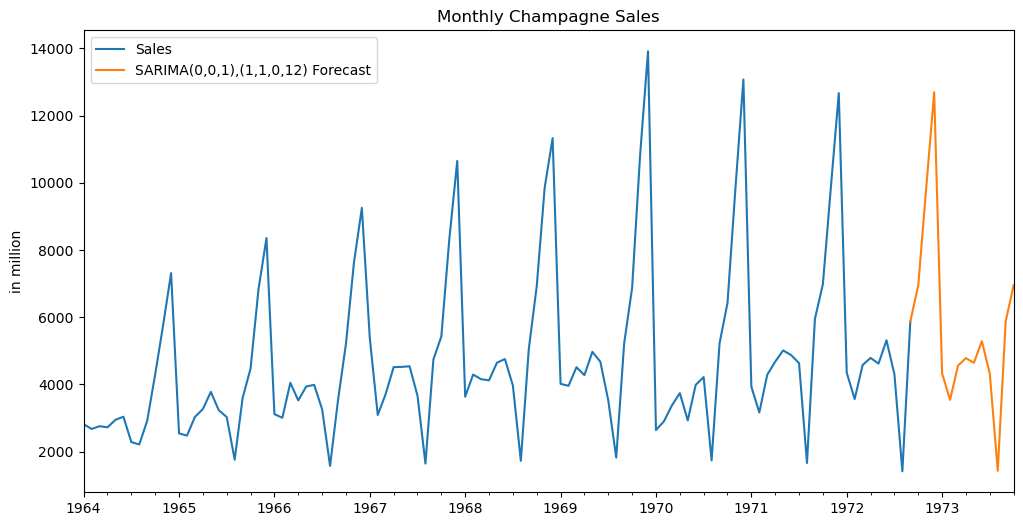

In [142]:
# Plot predictions against known values
title = 'Monthly Champagne Sales'
ylabel='in million'
xlabel=''

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# fb Prophet

In [80]:
from prophet import Prophet

In [81]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [82]:
df1=df.reset_index()
df1.drop('Sales First Difference', axis=1, inplace=True)

In [83]:
df1.head(3)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0


In [84]:
df1.columns=['ds','y']
df1.head(3)

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0


In [85]:
train_fb = pd.DataFrame(df1.iloc[:95])
test_fb = df1.iloc[95:]

In [86]:
test_fb.shape

(10, 2)

In [87]:
n = Prophet()

In [88]:
n.fit(train_fb)

15:57:48 - cmdstanpy - INFO - Chain [1] start processing
15:57:48 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
future = n.make_future_dataframe(periods=10,freq='MS')
forecast = n.predict(future)

In [90]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3593.779168,1490.360179,3402.616798,3593.779168,3593.779168,-1115.623269,-1115.623269,-1115.623269,-1115.623269,-1115.623269,-1115.623269,0.0,0.0,0.0,2478.155899
1,1964-02-01,3622.657067,1160.911961,3031.683893,3622.657067,3622.657067,-1519.606391,-1519.606391,-1519.606391,-1519.606391,-1519.606391,-1519.606391,0.0,0.0,0.0,2103.050675
2,1964-03-01,3649.671875,1993.883735,3886.175476,3649.671875,3649.671875,-742.777560,-742.777560,-742.777560,-742.777560,-742.777560,-742.777560,0.0,0.0,0.0,2906.894315
3,1964-04-01,3678.549773,1643.393425,3508.291777,3678.549773,3678.549773,-1045.254649,-1045.254649,-1045.254649,-1045.254649,-1045.254649,-1045.254649,0.0,0.0,0.0,2633.295124
4,1964-05-01,3706.496127,2022.249887,4015.765040,3706.496127,3706.496127,-719.334981,-719.334981,-719.334981,-719.334981,-719.334981,-719.334981,0.0,0.0,0.0,2987.161146


In [91]:
test_fb.tail()

,ds,y
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


<Axes: xlabel='ds'>

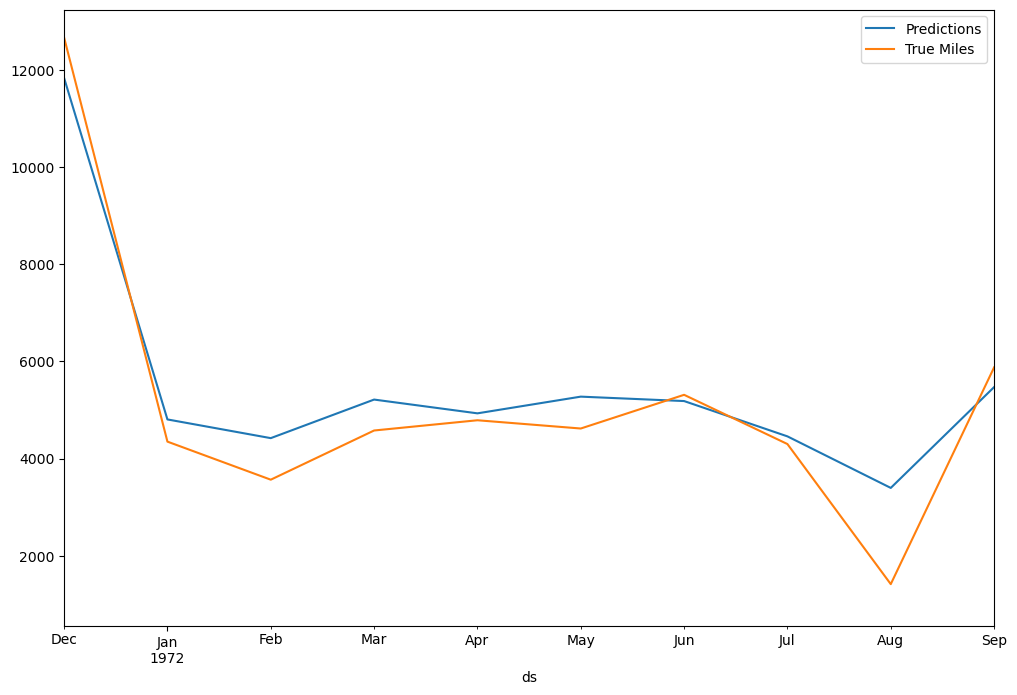

In [97]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test_fb.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('1971-12-01','1972-09-01'))

In [98]:
test_fb.shape

(10, 2)

## Evaluating the model

In [99]:
from statsmodels.tools.eval_measures import rmse

In [100]:
predictions_test = forecast.iloc[-10:]['yhat']

In [101]:
rmse(predictions_test,test_fb['y'])

813.9258202801458

## Forecasting sales for future

In [102]:
f = Prophet()

In [103]:
f.fit(df1)

16:04:55 - cmdstanpy - INFO - Chain [1] start processing
16:04:55 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future_fb = f.make_future_dataframe(periods=12,freq='MS')
forecast_fb = f.predict(future_fb)

In [105]:
forecast_fb

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3461.730244,1401.422927,3272.336794,3461.730244,3461.730244,-1119.146439,-1119.146439,-1119.146439,-1119.146439,-1119.146439,-1119.146439,0.0,0.0,0.0,2342.583805
1,1964-02-01,3493.469735,962.155535,2955.375982,3493.469735,3493.469735,-1599.706607,-1599.706607,-1599.706607,-1599.706607,-1599.706607,-1599.706607,0.0,0.0,0.0,1893.763128
2,1964-03-01,3523.161516,1733.455734,3753.167639,3523.161516,3523.161516,-795.163945,-795.163945,-795.163945,-795.163945,-795.163945,-795.163945,0.0,0.0,0.0,2727.997571
3,1964-04-01,3554.901007,1676.940744,3564.685216,3554.901007,3554.901007,-945.461550,-945.461550,-945.461550,-945.461550,-945.461550,-945.461550,0.0,0.0,0.0,2609.439457
4,1964-05-01,3585.616642,1875.417646,3787.808882,3585.616642,3585.616642,-742.694790,-742.694790,-742.694790,-742.694790,-742.694790,-742.694790,0.0,0.0,0.0,2842.921852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1973-05-01,5897.616731,4320.822589,6148.361689,5890.962618,5905.182278,-714.613920,-714.613920,-714.613920,-714.613920,-714.613920,-714.613920,0.0,0.0,0.0,5183.002811
113,1973-06-01,5910.812717,4365.900699,6257.982239,5902.116897,5920.177600,-614.944987,-614.944987,-614.944987,-614.944987,-614.944987,-614.944987,0.0,0.0,0.0,5295.867730
114,1973-07-01,5923.583026,3694.575927,5623.532489,5913.151408,5934.713610,-1293.443257,-1293.443257,-1293.443257,-1293.443257,-1293.443257,-1293.443257,0.0,0.0,0.0,4630.139770
115,1973-08-01,5936.779013,1838.418401,3837.284255,5924.701036,5949.389528,-3144.524371,-3144.524371,-3144.524371,-3144.524371,-3144.524371,-3144.524371,0.0,0.0,0.0,2792.254642


In [106]:
df1.tail()

,ds,y
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


<Axes: xlabel='ds'>

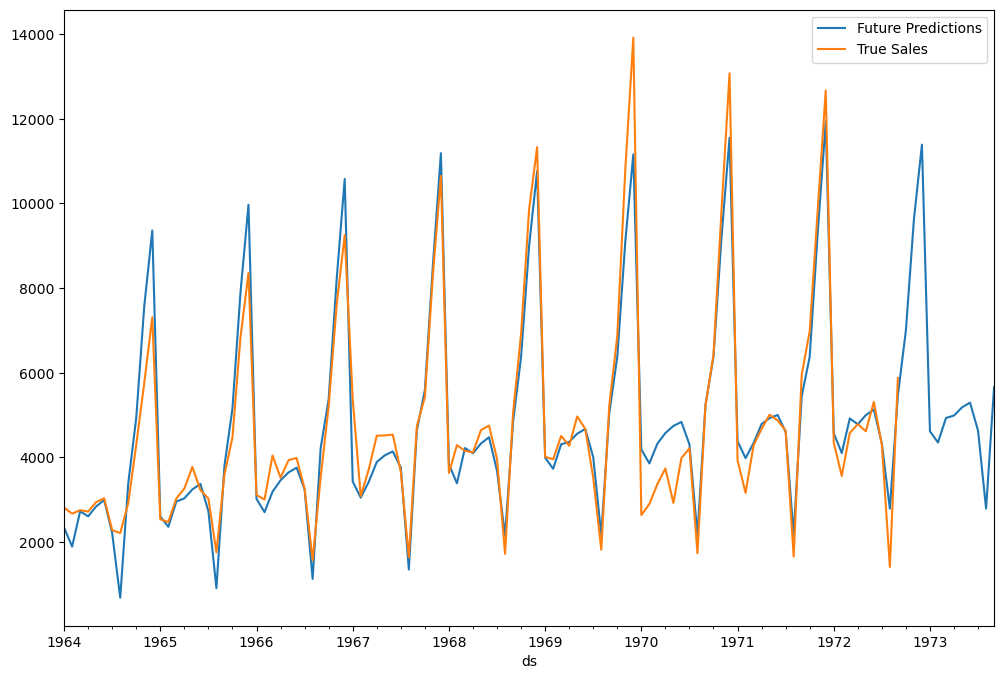

In [107]:
x = forecast_fb.plot(x='ds',y='yhat',label='Future Predictions',legend=True,figsize=(12,8))

df1.plot(x='ds',y='y',label='True Sales',legend=True,ax=x,xlim=('1964-01-01','1973-09-01'))

___

# LSTM


In [273]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [274]:
# df.drop('Sales First Difference', axis=1, inplace=True)

In [275]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [276]:
from statsmodels.tsa.seasonal import seasonal_decompose

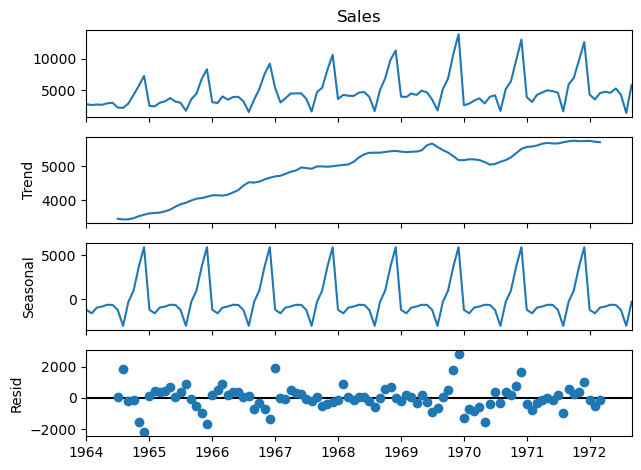

In [277]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [278]:
len(df)

105

In [279]:
train_lstm = df.iloc[:95]
test_lstm = df.iloc[95:]
test_lstm.shape

(10, 1)

### Scaling the data

In [280]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [281]:
scaler.fit(train_lstm)
scaled_train = scaler.transform(train_lstm)
scaled_test = scaler.transform(test_lstm)

### Preparing data for feeding into LSTM

In [282]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [283]:
# # define generator
# n_input = 3
n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [284]:
# X,y = generator[0]
# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

In [285]:
# X.shape, y.shape

In [286]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [287]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Applying LSTM

In [288]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [292]:
# Define model
model = Sequential()
model.add(LSTM(130, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [293]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 130)               68640     
                                                                 
 dense_12 (Dense)            (None, 1)                 131       
                                                                 
Total params: 68771 (268.64 KB)
Trainable params: 68771 (268.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [294]:
# fit model
model.fit(generator,epochs=80)

Epoch 1/80
83/83 [==============================] - 1s 2ms/step - loss: 0.0493
Epoch 2/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 3/80
83/83 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 4/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 5/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0237
Epoch 6/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 7/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 8/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 9/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0173
Epoch 10/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 11/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 12/80
83/83 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 13/80
83/83 [==============================

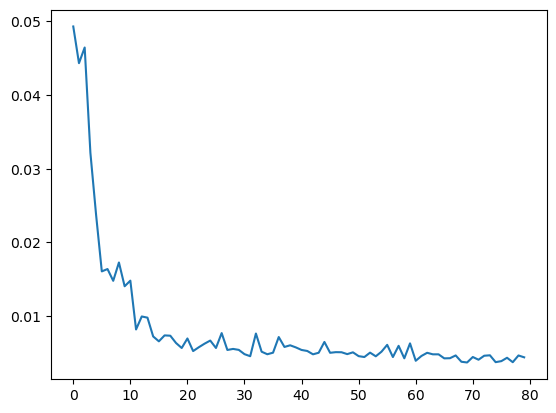

In [295]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [296]:
last_train_batch = scaled_train[-12:]

In [297]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [298]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 71ms/step


array([[0.8943417]], dtype=float32)

In [299]:
scaled_test[0]

array([0.89905209])

In [300]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_lstm)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 13ms/step


In [301]:
test_predictions

[array([0.8943417], dtype=float32),
 array([0.2049466], dtype=float32),
 array([0.16169813], dtype=float32),
 array([0.2094892], dtype=float32),
 array([0.23152557], dtype=float32),
 array([0.25240114], dtype=float32),
 array([0.24823856], dtype=float32),
 array([0.23927733], dtype=float32),
 array([0.04372661], dtype=float32),
 array([0.3325722], dtype=float32)]

In [302]:
test_lstm.head()
test_lstm.shape

(10, 1)

In [303]:
true_predictions = scaler.inverse_transform(test_predictions)

In [304]:
test_lstm['Predictions'] = true_predictions
test_lstm

,Sales,Predictions
Month,,
1971-12-01,12670.0,12611.859692
1972-01-01,4348.0,4102.655975
1972-02-01,3564.0,3568.840053
1972-03-01,4577.0,4158.725153
1972-04-01,4788.0,4430.720112
1972-05-01,4618.0,4688.387312
1972-06-01,5312.0,4637.008590
1972-07-01,4298.0,4526.400121
1972-08-01,1413.0,2112.717524


<Axes: xlabel='Month'>

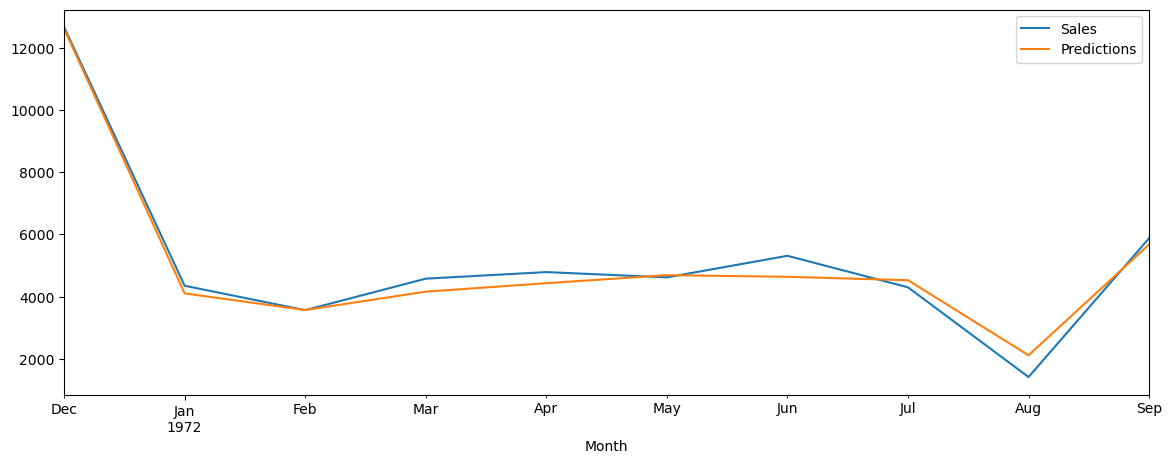

In [305]:
test_lstm.plot(figsize=(14,5))

In [306]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test_lstm['Sales'],test_lstm['Predictions']))
print(rmse)

375.2551985077618


### Forecasting sales for future 12 months

In [307]:
data = df.iloc[:]
data.shape

(105, 1)

In [308]:
scaler.fit(data)
scaled_data = scaler.transform(data)


In [309]:
# define generator
n_input = 12
n_features = 1
generator_f = TimeseriesGenerator(scaled_data, scaled_data, length=n_input, batch_size=1)

In [310]:
future_predictions = []

first_eval_batch = scaled_data[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    future_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 14ms/step


In [311]:
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions

array([[ 6897.75223663],
       [10046.28971714],
       [12412.61353344],
       [ 4254.31954125],
       [ 3686.39687696],
       [ 4249.23069125],
       [ 4434.95937014],
       [ 4401.26721108],
       [ 4865.69883072],
       [ 4277.01945642],
       [ 1924.97270183],
       [ 5577.6277149 ]])

In [312]:
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [315]:
date_idx = pd.date_range('1972-09-01', periods=12,freq='M')
date_idx 

DatetimeIndex(['1972-09-30', '1972-10-31', '1972-11-30', '1972-12-31',
               '1973-01-31', '1973-02-28', '1973-03-31', '1973-04-30',
               '1973-05-31', '1973-06-30', '1973-07-31', '1973-08-31'],
              dtype='datetime64[ns]', freq='M')

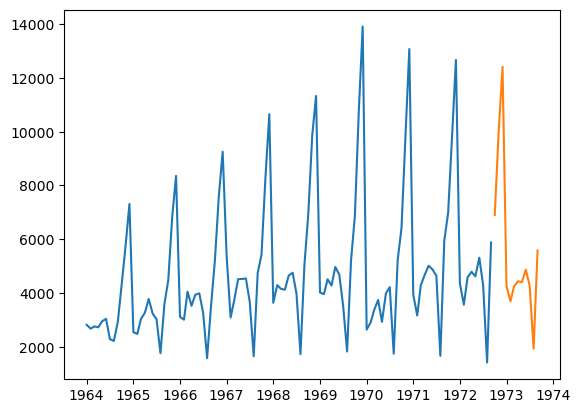

In [316]:
plt.plot(df['Sales'])
plt.plot(date_idx,future_predictions)